<a href="https://colab.research.google.com/github/arthurcarvalhoc/statistics/blob/main/wilcoxon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas


In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Conhecendo os nossos dados

In [ ]:
df = pd.read_csv("data.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [ ]:
df.shape

(120, 5)

In [ ]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


(array([12., 19., 21., 12., 16., 15.,  9., 10.,  2.,  4.]),
 array([138. , 142.7, 147.4, 152.1, 156.8, 161.5, 166.2, 170.9, 175.6,
        180.3, 185. ]),
 <a list of 10 Patch objects>)

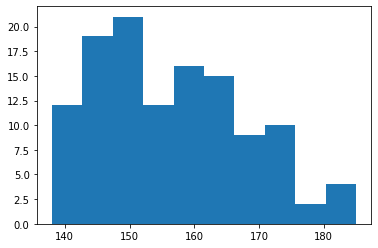

In [ ]:
plt.hist(df[ 'bp_before' ])

(array([ 3., 19., 14., 20., 19., 14., 10., 10.,  7.,  4.]),
 array([125., 131., 137., 143., 149., 155., 161., 167., 173., 179., 185.]),
 <a list of 10 Patch objects>)

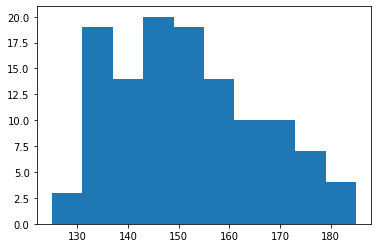

In [ ]:
plt.hist(df[ 'bp_after' ])

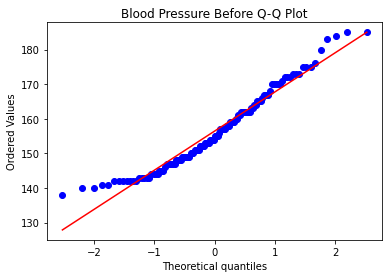

In [ ]:
stats.probplot(df['bp_before'], dist="norm", plot=plt)
plt.title("Blood Pressure Before Q-Q Plot")
plt.savefig("BP_Before_QQ.png")

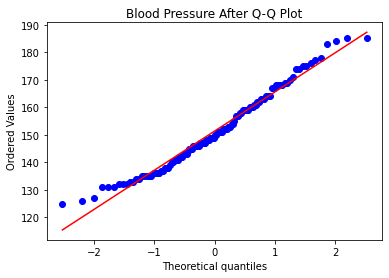

In [ ]:
stats.probplot(df['bp_after'], dist="norm", plot=plt)
plt.title("Blood Pressure After Q-Q Plot")
plt.savefig("BP_After_QQ.png")

# Verificando a normalidade

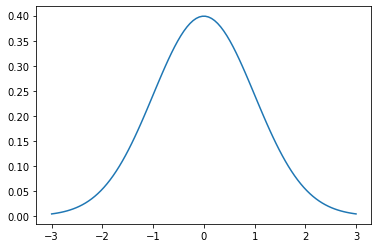

In [ ]:
import math
import numpy as np

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Para ambas as variáveis, parece haver algumas violações da normalidade, particularmente no início e no final dos dados. Para “bp_before”, parece haver violações adicionais entre -1 e 0. Vamos testar isso estatisticamente para ver se os dados são normalmente distribuídos. Para testar isso, pode-se usar o teste Shapiro-Wilk para normalidade. Infelizmente, a saída não é rotulada. O primeiro valor é o valor do teste W, e o segundo valor é o valor p.

In [ ]:
stats.shapiro(df['bp_before'])

(0.9547787308692932, 0.0004928423441015184)

In [ ]:
stats.shapiro(df['bp_after'])

(0.9740639328956604, 0.020227791741490364)

# Realizando o teste com Scipy

A hipótese a ser testada é:


*   Hipótese nula (H 0 ) : A diferença entre os pares segue uma distribuição simétrica em torno de zero.

*   Hipótese alternativa (HA ) : A diferença entre os pares não segue uma distribuição simétrica em torno de zero.


Ambas as variáveis ​​têm um valor p significativo, o que significa que cada variável viola a suposição de normalidade. Portanto, o teste de postos sinalizados de Wilcoxon, também conhecido como teste T de Wilcoxon, é o teste correto a ser usado para analisar esses dados.

In [ ]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

## Conclusão

Os resultados são estatisticamente significativos! Pode-se rejeitar a hipótese nula em apoio da alternativa.

Um teste T de Wilcoxon foi usado para analisar a pressão arterial antes e após a intervenção para testar se a intervenção teve um efeito significativo na pressão arterial. A pressão arterial antes da intervenção foi maior (M= 156,45 ± 11,39 unidades) em relação à pressão arterial pós-intervenção (M= 151,36 ± 14,18 unidades); houve diminuição estatisticamente significativa da pressão arterial (t=2.234,5, p= 0,0014).